In [7]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
import numpy as np

import os
from PIL import Image

In [8]:
IMAGE_SIZE = 128
CHANNELS = 3
BATCH_SIZE = 32

In [9]:
class LoadDataset(Dataset):
    def __init__(self, root_dir, transform):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, fname) for fname in os.listdir(root_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        print(f"Loading image: {img_path}")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

In [10]:
transform = transforms.Compose([
    transforms.Resize([IMAGE_SIZE, IMAGE_SIZE]), # Resizing images to 128 x 128
    transforms.ToTensor(), # Converting images to tensors
])
traindataset = LoadDataset(root_dir = '../data/SARscope/train/', transform = transform)
testdataset = LoadDataset(root_dir = '../data/SARscope/test/', transform = transform)
validdataset = LoadDataset(root_dir = '../data/SARscope/valid/', transform = transform)


trainloader = DataLoader(dataset = traindataset, batch_size = BATCH_SIZE, shuffle = True)
testloader = DataLoader(dataset = testdataset, batch_size = BATCH_SIZE, shuffle = True)
validloader = DataLoader(dataset = validdataset, batch_size = BATCH_SIZE, shuffle = True)

Loading image: ../data/SARscope/test/P0035_6260_7060_6600_7400_png.rf.df76c29c7271a4de8f3876f9315fb017.jpg
Loading image: ../data/SARscope/test/P0037_1800_2600_2400_3200_png.rf.c0ccf9ed101664772c263b807676cfbb.jpg
Loading image: ../data/SARscope/test/P0067_1200_2000_1800_2600_png.rf.119340e489caefe16f21c0ef5db9b6f3.jpg
Loading image: ../data/SARscope/test/P0060_1800_2600_4800_5600_png.rf.63dc409f1314632ef1bd9157ec79120c.jpg
Loading image: ../data/SARscope/test/P0049_2400_3200_3600_4400_png.rf.2f9b1ec8bcfa79984ddd3ade73ceb4a9.jpg
Loading image: ../data/SARscope/test/P0121_1800_2600_4200_5000_png.rf.c679b4a8709270cd44cac153403f71b5.jpg
Loading image: ../data/SARscope/test/P0128_4800_5600_4800_5600_png.rf.6f50639c407074d4c42b927a81edcc79.jpg
Loading image: ../data/SARscope/test/P0085_1200_2000_2400_3200_png.rf.ee8e3a33fbe37ba1a9718cbae1fa46c4.jpg
Loading image: ../data/SARscope/test/P0039_0_800_8400_9200_png.rf.6c57bf484c06616009a9b34b078ee235.jpg
Loading image: ../data/SARscope/test/0003

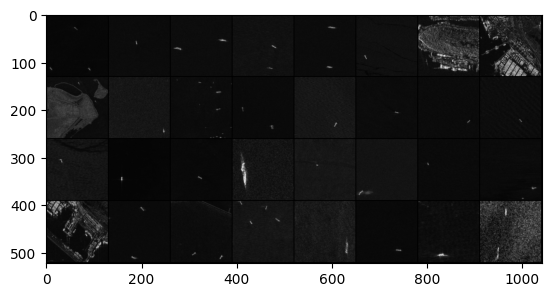

In [11]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [12]:
print(images)

tensor([[[[0.0353, 0.0353, 0.0275,  ..., 0.0314, 0.0314, 0.0235],
          [0.0275, 0.0314, 0.0275,  ..., 0.0314, 0.0275, 0.0314],
          [0.0275, 0.0314, 0.0353,  ..., 0.0275, 0.0235, 0.0275],
          ...,
          [0.0275, 0.0314, 0.0275,  ..., 0.0275, 0.0314, 0.0314],
          [0.0235, 0.0235, 0.0235,  ..., 0.0275, 0.0314, 0.0353],
          [0.0235, 0.0235, 0.0235,  ..., 0.0275, 0.0314, 0.0353]],

         [[0.0353, 0.0353, 0.0275,  ..., 0.0314, 0.0314, 0.0235],
          [0.0275, 0.0314, 0.0275,  ..., 0.0314, 0.0275, 0.0314],
          [0.0275, 0.0314, 0.0353,  ..., 0.0275, 0.0235, 0.0275],
          ...,
          [0.0275, 0.0314, 0.0275,  ..., 0.0275, 0.0314, 0.0314],
          [0.0235, 0.0235, 0.0235,  ..., 0.0275, 0.0314, 0.0353],
          [0.0235, 0.0235, 0.0235,  ..., 0.0275, 0.0314, 0.0353]],

         [[0.0353, 0.0353, 0.0275,  ..., 0.0314, 0.0314, 0.0235],
          [0.0275, 0.0314, 0.0275,  ..., 0.0314, 0.0275, 0.0314],
          [0.0275, 0.0314, 0.0353,  ..., 0